In [1]:
# -*- coding: utf-8 -*-
"""Pnevmaniya

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/#fileId=https%3A//storage.googleapis.com/kaggle-colab-exported-notebooks/pnevmaniya-2a10f7a8-8811-4cdf-8ed4-75c53c383730.ipynb%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com/20240511/auto/storage/goog4_request%26X-Goog-Date%3D20240511T171502Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da179f13e973d28e685a88887ce581b890e1b7db151a061ca9b09a1959367af18c4a7e3b7040d371aa6d10579a8dceebcb6182ffe2d5a8c00037c58b4739343d31be713424066936dd9dd1c460cc972a376f32e42fd82455a8f7c1d6b7d551591d0e8f170280be87ba7d972f5b0d4f1ac0218cec32729eebf40bc4874d4ce09daf10da6a2abe2818729a7e48b07c660cb2ba0c89cd5158978cd413f60cfe047f5fe6639f4cf99f4aa186f85e77d0d5bc861e86f01a7541979d0d084433df393357a2eba51b15b9a6555128b2ad5f2654e0caa50a44b6f163681329ab6905a2bd01ff441bd33e3e961fb03ea826d3896b504624323c1fe974319ecfc55c69d183b
"""

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'pnevmoniya:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F36499%2F3618301%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240511%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240511T171502Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D630b87516c662b02775a15088ed3903c58fde666d5a0c8d0674d7cb1d25e70f1d562b992f76d38fd7367edbd7024bca0943661ce25a6635a0a5dfd4801f67da465bd28afb50274be4d74be0499175cc78f424a32c8bb4af155ccea9f5cde1b9c2edb6ea5c89beca6185dc3c65cfe315a9dc7684b3d7209ec125f6246c35a22dc3ef2e44dc552f36239ecfd0b7dde981d43690bcbd8d4fd5d4be4088fda0560510ad6ba7829bf843516ef0914cddd3e564a48d8c88535412cb55bdb2e0b499348eb6bf255e45c885df8f7e57c51acbbbf7dc498b38b795e47955085203aa25f48a149fde20d0b3b967a70db6c0410169cd979e8d6a78f50425d216e520d3107bc,chest-xray-pneumonia:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F17810%2F23812%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240511%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240511T171502Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4cd520baac6af9bb837ac75453cd5b0205dd1ae829076cc348a436c7977bfa60240d0935af8574daa970cc16ecb4451806142cadaf9f441376555510cf172d7089dcbe117e495cf287312b3a94a12c22cf97fac11c55a2ca923af69e55202f97f40a5961aa348ee9847656225f83b6ce89273349dbb2406007ba2d6e7d25b5ec2d8c2f23ed0d78c533a28b6872ede7fa1139d50f02ee3db502989ef9bacfa6cbc22eb7f4340aac7a2150ab7b1e8934ae0961489eb0491afc0a071877ffa82520d4a5ae2cb6cbd9261f4fde6fec8e5e08672159f1c90f2f790e2ce38cf5ec79c12fd2a2db1e41416cbe82f6d780ff771478787f1838c88d21cf5be51c57149434'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

[==================================================] 1222792613 bytes downloaded
Downloaded and uncompressed: pnevmoniya
[==================================================] 2463365435 bytes downloaded
Downloaded and uncompressed: chest-xray-pneumonia


In [2]:
# Kutubxonalarni chaqrib olish
import pandas as pd
import numpy as np

import torch
import fastai

from fastai.vision.all import *
from ipywidgets import widgets

In [3]:
# Datasetimizga yo'lni belgilab qo'yish
path = Path('../input/chest-xray-pneumonia')

In [4]:
path.ls()

(#1) [Path('../input/chest-xray-pneumonia/chest_xray')]

In [5]:

def data_loader(data):
    model = DataBlock(
        blocks = (ImageBlock, CategoryBlock),
        get_items = get_image_files,
        get_y = parent_label,
        item_tfms = Resize(224)
    )

    dls = model.dataloaders(data)
    return dls

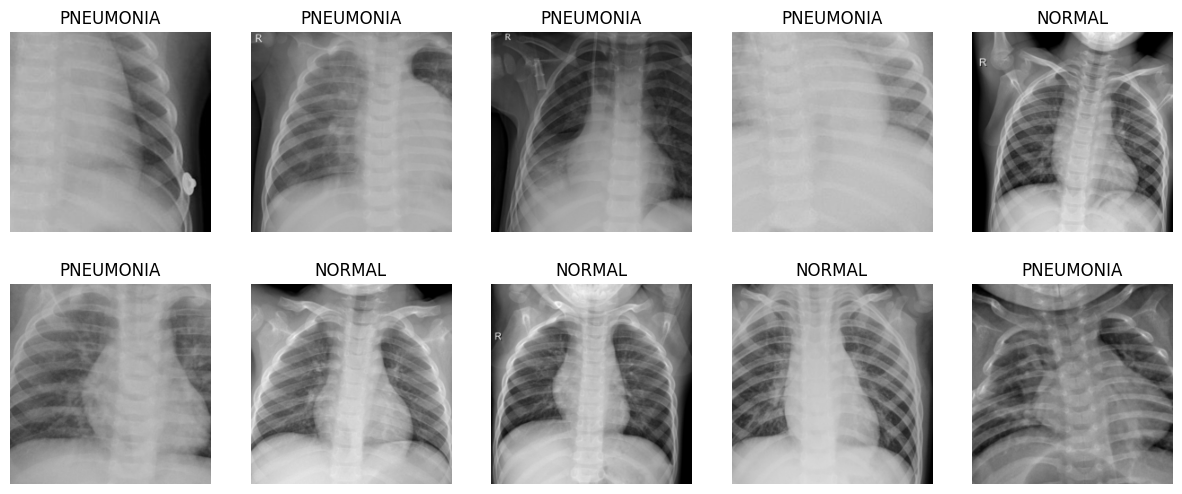

In [6]:
dls = data_loader(path)
dls.train.show_batch(max_n=10, nrows=2)

In [7]:
model = cnn_learner(dls, resnet152, metrics=accuracy)
model.fine_tune(10)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet152-f82ba261.pth" to /root/.cache/torch/hub/checkpoints/resnet152-f82ba261.pth
100%|██████████| 230M/230M [00:03<00:00, 70.8MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.365213,0.206434,0.937660,05:28


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,accuracy,time
0,0.166620,0.105089,0.961571,05:18
1,0.107020,0.080302,0.976089,04:47
2,0.069977,0.053866,0.980786,04:49
3,0.046360,0.053037,0.983348,04:48
4,0.031052,0.048148,0.986336,04:48
5,0.022457,0.034760,0.992314,04:46
6,0.011761,0.026105,0.994449,04:49
7,0.015152,0.016321,0.997438,04:45
8,0.004702,0.017645,0.997438,04:44
9,0.004999,0.017479,0.997438,04:41


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


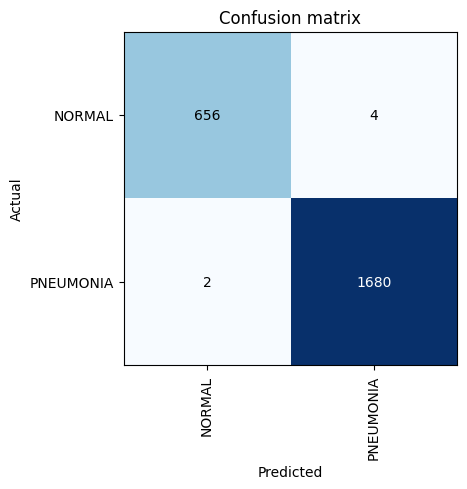

In [12]:
cm = ClassificationInterpretation.from_learner(model)
cm.plot_confusion_matrix()

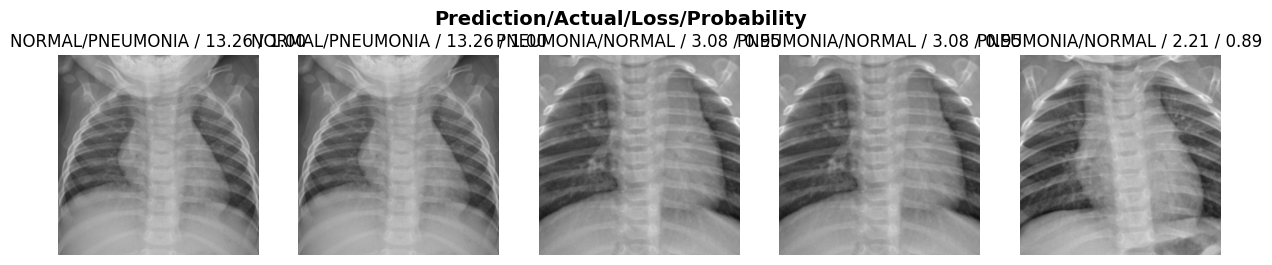

In [20]:
cm.plot_top_losses(5, nrows=1)

In [21]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat:PNEUMONIA
Ehtimollik:100.00


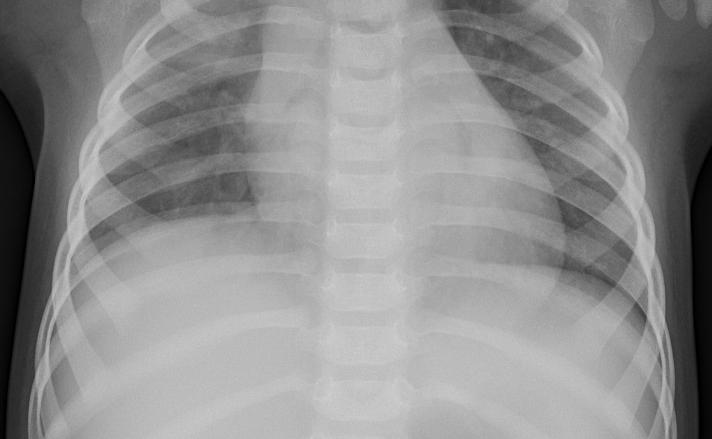

In [23]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = model.predict(img)
print(f"Bashorat:{pred}")
print(f"Ehtimollik:{probs[pred_id]*100:.2f}")
img

In [8]:
df = pd.read_csv('../input/pnevmoniya/sample_solution.csv')
df.head()

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0


In [ ]:
for i in range(0,624):
    label = df.iloc[i,0]
    img = PILImage.create(Path(f'../input/pnevmoniya/test/{label}'))
    pred, _, prob = model.predict(img)
    df.iloc[i,1] = pred

In [10]:
df['labels'] = df['labels'].replace({'PNEUMONIA': 1, 'NORMAL': 0})
df.to_csv('submission.csv', index=False)


In [11]:
df = pd.read_csv("submission.csv")
df.head()

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,0


In [24]:
model.export("pnevmaniya_model.pkl")

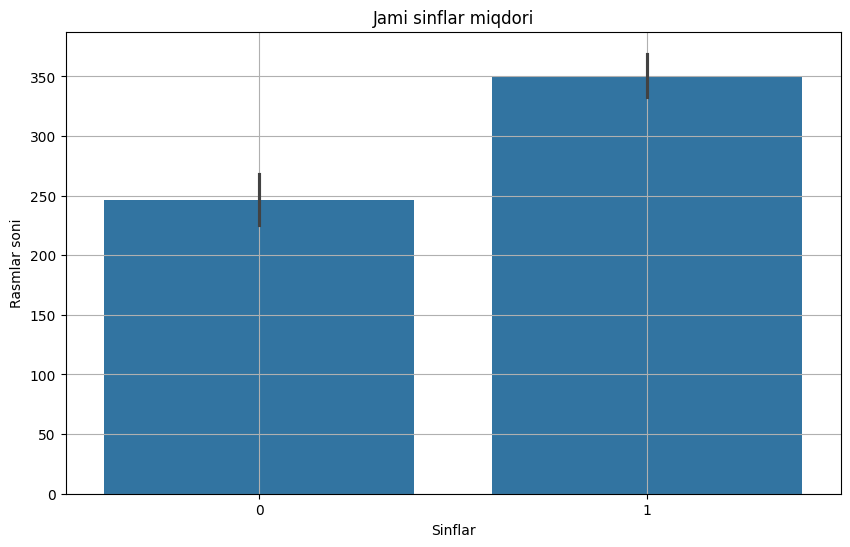

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(data=df,x=df['labels'],y=df.index)
plt.xlabel("Sinflar")
plt.ylabel("Rasmlar soni")
plt.title("Jami sinflar miqdori")
plt.grid()
plt.show()